# Machine Learning Unsupervised


## Clustering on a breast cancer dataset

In this exercise, we will perform clustering on a set which contains samples that are diagnosed with breast cancer (malignant samples) and samples that are healthy (benign samples). We will use dimensionality reduction techniques and clustering techniques as discussed in ML chapter 8 and the syllabus on Cluster Analysis.

__Goal:__
The purpose of this notebook is to learn how to use several unsupervised learning algorithms using sklearn.   

__At the end of this notebook you will be able to:__
> 1. Run a K-means, DBSCAN, HAC and spectral algorithm.
> 2. Understand how you can configure the algorithm.
> 3. Know how to determine the optimal number of clusters.
> 4. Understand how you can evaluate the performance of the algorithms.
> 5. Know the advantages and disadvantages of the algorithms.



## The dataset
The data can be downloaded here: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data. For a description of the data, see here: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data. We have the labels for the samples, so we can use this data set to evaluate clustering algorithms.



# Load and inspect the data

1. Load the data
2. Inspect the data.
    - How many samples are classified as Benign, and how many as Malignant?
    - What features are there? What do the column names mean?
    - Are there missing values?
    - Can all features be used or do we have to throw some away?
    - How are the features distributed

3. Make the data set ready for clustering. Remember to remove the diagnosis-column, as this should not be input for clustering. However, this data must be stored separately so it can be used for performance evaluation of the clustering.

In [78]:
import pandas as pd
import numpy as np

In [187]:
data = pd.read_csv('data/breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

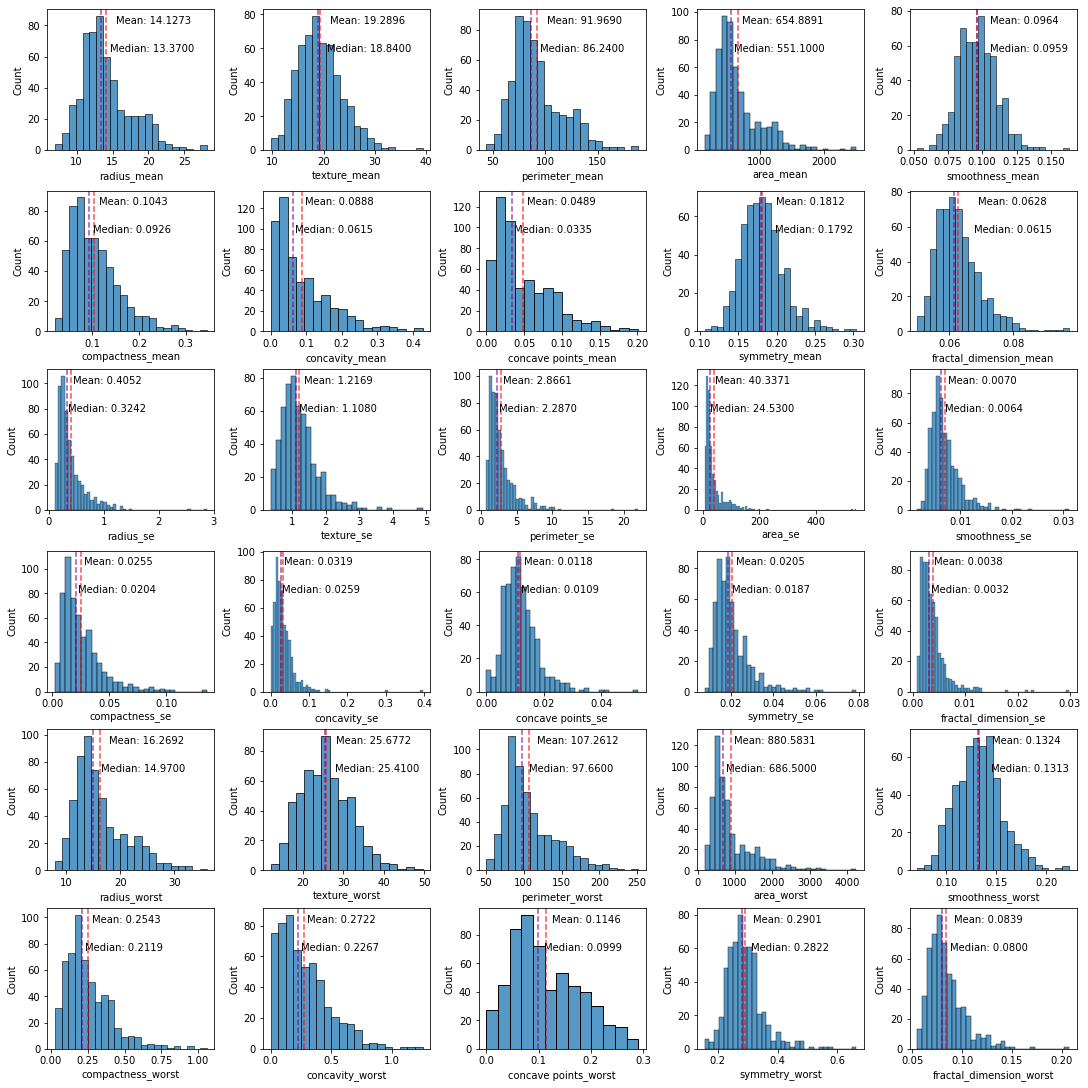

In [230]:
# select all columns except ID and Diagnosis
# 30 columns for X
X = data.iloc[:, 2:]
y = data['diagnosis']

# plot distribution
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(6, 5, figsize=(15, 15), constrained_layout=True)

for ax, col in zip(axs.flatten(), X.columns):
    mean = X[col].mean()
    median = X[col].median()
    
    sns.histplot(data=X, x=col, ax=ax)
    ax.axvline(mean, ls='--', color='red', alpha=0.7)
    ax.axvline(median, ls='--', color='purple', alpha=0.7)
    
    min_ylim, max_ylim = ax.get_ylim()
    ax.text(mean*1.1, max_ylim*0.9, 'Mean: {:.4f}'.format(mean))
    ax.text(median*1.1, max_ylim*0.7, 'Median: {:.4f}'.format(median))

In [195]:
# X.skew().sort_values(ascending=False)

In [193]:
# you can also get the skewed columns and perform np.log1p on those specific cols


# Perform log transform on skewed columns
# for col in skew_columns.index.tolist():
#     data[col] = np.log1p(data[col])

# skew_cols = (X.skew().sort_values(ascending=False))
# skew_cols = skew_cols.loc[(skew_cols > 0.75)]

# X_test = X.copy()

# for col in skew_cols.index.tolist():
#     X_test[col] = np.log1p(X_test[col])

In [194]:
# fig, axs = plt.subplots(6, 5, figsize=(15, 15), constrained_layout=True)

# for ax, col in zip(axs.flatten(), X_test.columns):
#     sns.histplot(data=X_test, x=col, ax=ax)
    
# Test whether the skew is different from the normal distribution
# from_gauss = []
# not_from_gauss = []

# for col in X.columns:
#     stat, p = stats.skewtest(X_test[col])

#     if p < 0.05:
#         not_from_gauss.append(col)
#     else:
#         from_gauss.append(col)
        
# print('Test if skewness is Gaussian: ')
# print(f'{len(is_gauss)} columns are from Gaussian.')
# print(f'{len(not_gauss)} columns are not from Gaussian.')   

Most of the data has positive skewness (right-tailed).

In [61]:
# Test whether the skew is different from the normal distribution
from_gauss = []
not_from_gauss = []

for col in X.columns:
    stat, p = stats.skewtest(X[col])

    if p < 0.05:
        not_from_gauss.append(col)
    else:
        from_gauss.append(col)
        
print('Test if skewness is Gaussian: ')
print(f'{len(is_gauss)} columns are from Gaussian.')
print(f'{len(not_gauss)} columns are not from Gaussian.')   

Test if skewness is Gaussian: 
0 columns are from Gaussian.
30 columns are not from Gaussian.


In [58]:
from scipy import stats

is_gauss = []
not_gauss = []
for col in X.columns:
    shapiro_test = stats.shapiro(X[col])
    p_val = shapiro_test.pvalue
    
    if p_val < 0.05:
        not_gauss.append(col)
    else:
        is_gauss.append(col)
    
print('Shapiro: ')
print(f'{len(is_gauss)} columns are Gaussian.')
print(f'{len(not_gauss)} columns are not Gaussian.')

# anderson
is_gauss = []
not_gauss = []
for col in X.columns:
    anderson_test = stats.anderson(X[col], dist='norm')
    crit_val = anderson_test.critical_values[2]
    if anderson_test.statistic > crit_val:
        not_gauss.append(col)
    else:
        is_gauss.append()
        
print('\nAnderson:')
print(f'{len(is_gauss)} columns are Gaussian.')
print(f'{len(not_gauss)} columns are not Gaussian.')

# bartlett to check for equal variances
# will probably not be equal.
stat, p = stats.bartlett(*X.values.tolist())
print('\nBartlett check for equal variances: ')
print(f'p-value: {p:.3f}')
print('Reject null hypothesis, therefore no equal variances.')

# Levene to check for equal variances
# more robust for non-normal populations
stat, p = stats.levene(*X.values.tolist(), center='median')
print('\nLevene check for equal variances: ')
print(f'p-value: {p:.3f}')
print('Accept null hypothesis, therefore equal variances.')
print('Be aware that this one used the median!')

Shapiro: 
0 columns are Gaussian.
30 columns are not Gaussian.

Anderson:
0 columns are Gaussian.
30 columns are not Gaussian.

Bartlett check for equal variances: 
p-value: 0.000
Reject null hypothesis, therefore no equal variances.

Levene check for equal variances: 
p-value: 1.000
Accept null hypothesis, therefore equal variances.
Be aware that this one used the median!


Most of the distributions are **not** Gaussian. Therefore, data should be transformed! It does not make sense to use the StandardScaler immediately, as skewed distributions will influence the scaler!

However, the equal variances from Levene give some hints to use the `RobustScaler` because it used the median!

To remove skewness we use `boxcox` transformation or the `yeojohnson` transformation. To reduce positively skewed data, a log-transform is useful (power transform)

In [71]:
# boxcox requires all variables to be > 0
# the lowest value is 0, therefore we run into trouble
# a workaround would be to add a very small number
X.min()

radius_mean                  6.981000
texture_mean                 9.710000
perimeter_mean              43.790000
area_mean                  143.500000
smoothness_mean              0.052630
compactness_mean             0.019380
concavity_mean               0.000000
concave points_mean          0.000000
symmetry_mean                0.106000
fractal_dimension_mean       0.049960
radius_se                    0.111500
texture_se                   0.360200
perimeter_se                 0.757000
area_se                      6.802000
smoothness_se                0.001713
compactness_se               0.002252
concavity_se                 0.000000
concave points_se            0.000000
symmetry_se                  0.007882
fractal_dimension_se         0.000895
radius_worst                 7.930000
texture_worst               12.020000
perimeter_worst             50.410000
area_worst                 185.200000
smoothness_worst             0.071170
compactness_worst            0.027290
concavity_wo

In [232]:
X_transf_box = X.copy()
X_transf_box = X_transf_box.where(X_transf_box > 0, 0.000001)

for col in X_transf_box.columns:
    arr, _ = stats.boxcox(X_transf_box[col])
    
    X_transf_box[col] = arr

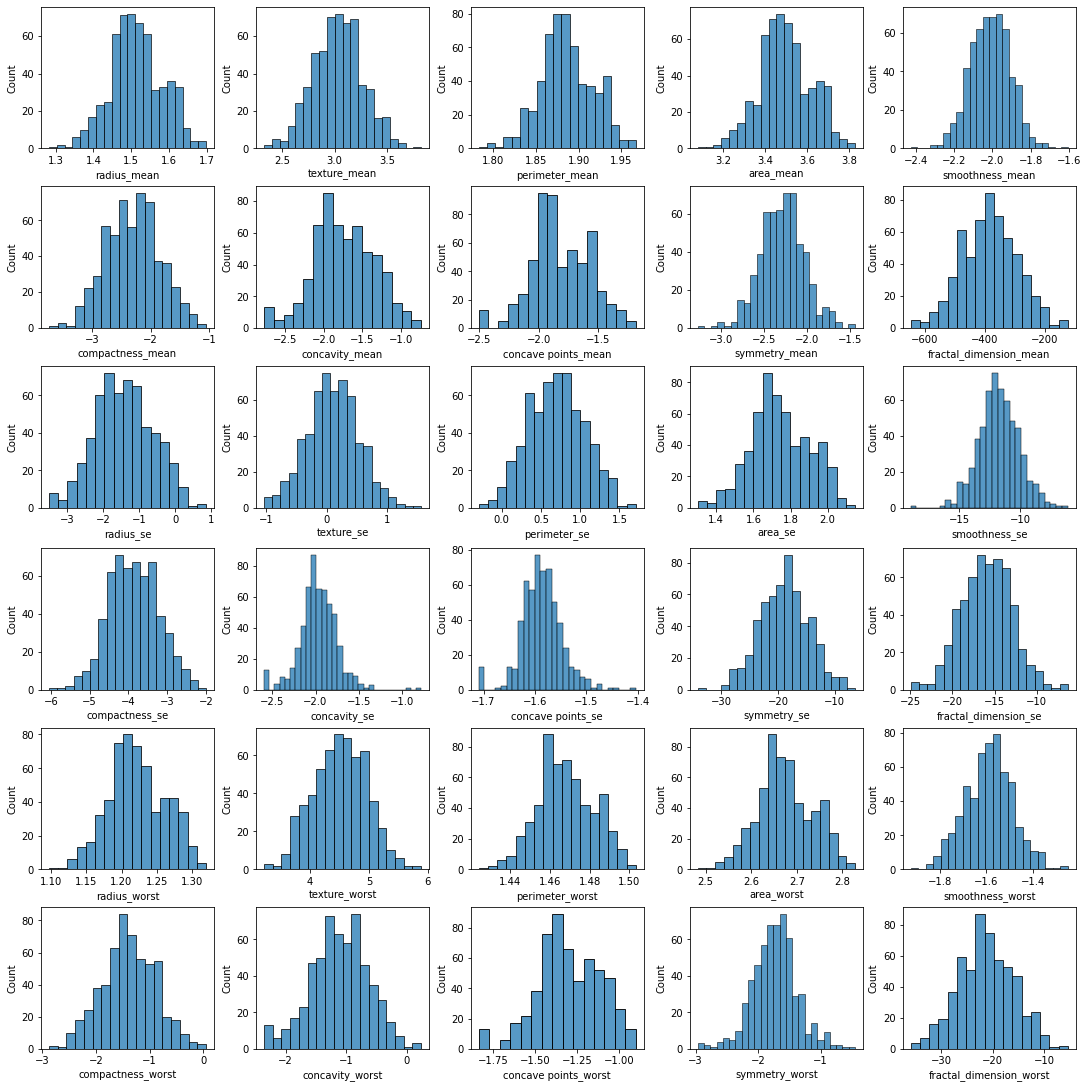

In [234]:
fig, axs = plt.subplots(6, 5, figsize=(15, 15), constrained_layout=True)

for ax, col in zip(axs.flatten(), X_transf_box.columns):
    sns.histplot(data=X_transf_box, x=col, ax=ax)

In [108]:
is_gauss = []
not_gauss = []
for col in X_transf_box.columns:
    shapiro_test = stats.shapiro(X_transf_box[col])
    p_val = shapiro_test.pvalue
    
    if p_val < 0.05:
        not_gauss.append(col)
    else:
        is_gauss.append(col)
    
print('Shapiro: ')
print(f'{len(is_gauss)} columns are Gaussian.')
print(f'{len(not_gauss)} columns are not Gaussian.')

not_gauss

Shapiro: 
16 columns are Gaussian.
14 columns are not Gaussian.


['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'area_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst']

Not all features are Gaussian, although most are now. Due to the fact that not every feature is Gaussian, I'll scale them with a robust classifier.

In [134]:
from sklearn.preprocessing import QuantileTransformer, RobustScaler

In [157]:
# qt = QuantileTransformer(n_quantiles=X_transf_box.shape[0], output_distribution='normal')
# res = qt.fit_transform(X_transf_box)
scaler = RobustScaler()
res = scaler.fit_transform(X_transf_box)

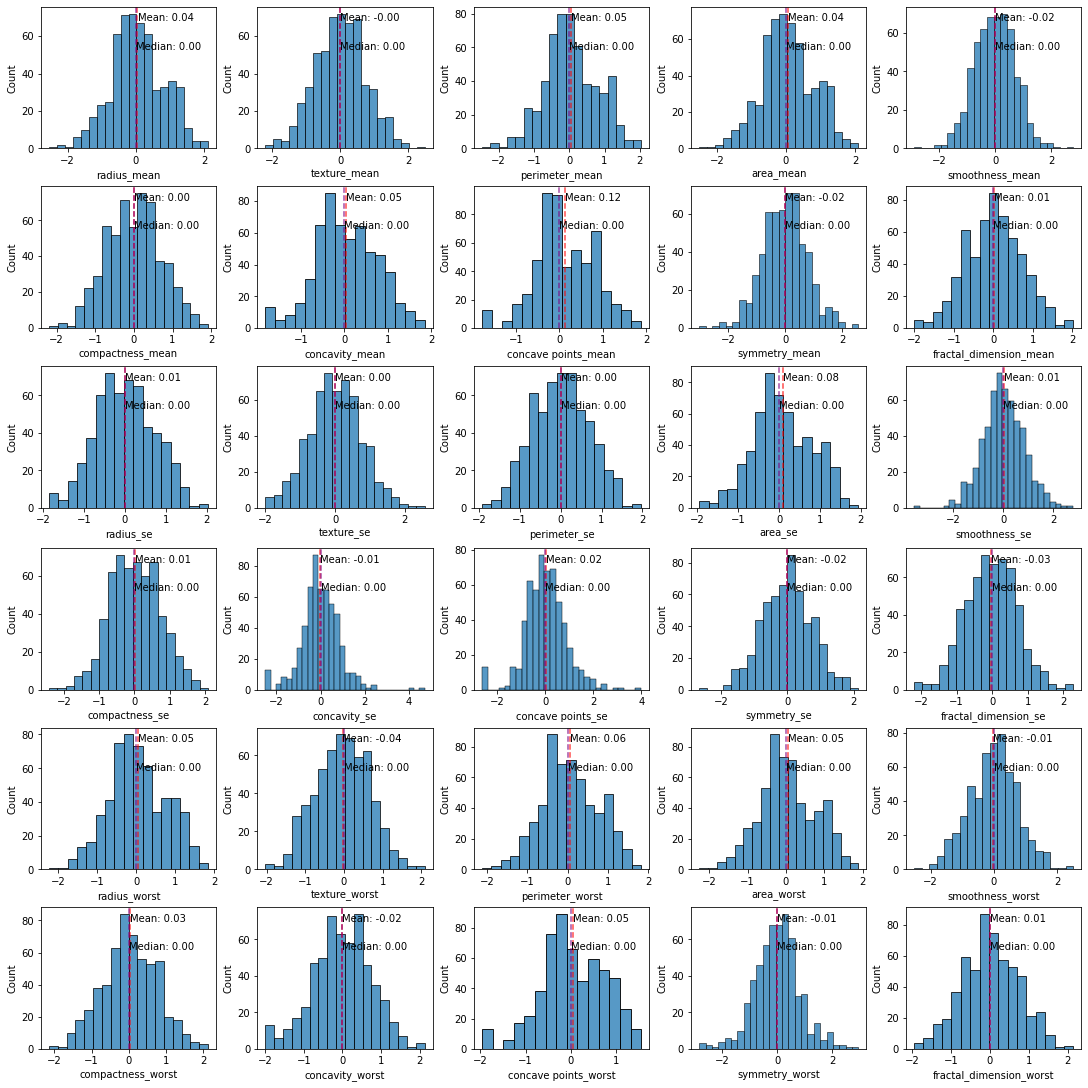

In [228]:
fig, axs = plt.subplots(6, 5, figsize=(15, 15), constrained_layout=True)

X_scaled = pd.DataFrame(data=res, columns=X.columns)

for ax, col in zip(axs.flatten(), X_scaled.columns):
    mean = X_scaled[col].mean()
    median = X_scaled[col].median()
    sns.histplot(data=X_scaled, x=col, ax=ax)
    
    ax.axvline(mean, ls='--', color='red', alpha=0.7)
    ax.axvline(median, ls='--', color='purple', alpha=0.7)
    
    min_ylim, max_ylim = ax.get_ylim()
    ax.text(mean*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(mean))
    ax.text(median*1.1, max_ylim*0.7, 'Median: {:.2f}'.format(median))

In [204]:
X_scaled.var()

radius_mean                0.616654
texture_mean               0.546221
perimeter_mean             0.578998
area_mean                  0.591390
smoothness_mean            0.539174
compactness_mean           0.502629
concavity_mean             0.508742
concave points_mean        0.481115
symmetry_mean              0.606131
fractal_dimension_mean     0.520299
radius_se                  0.512544
texture_se                 0.561059
perimeter_se               0.475660
area_se                    0.521204
smoothness_se              0.644867
compactness_se             0.512684
concavity_se               0.749537
concave points_se          0.734160
symmetry_se                0.548230
fractal_dimension_se       0.525692
radius_worst               0.537690
texture_worst              0.488914
perimeter_worst            0.505887
area_worst                 0.531656
smoothness_worst           0.590492
compactness_worst          0.534607
concavity_worst            0.576689
concave points_worst       0

**Conclusion**:
- Diagnosis:
    - 357 tumours are benign.
    - 212 tumours are malignant.
    - therefore it is an unbalanced dataset.
- There are NO missing values.
- Columns:
    - Several measurement characteristics of each cell nucleus.
        - the mean
        - the standard error
        - worst is the mean of the three largest values.
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)
- Scale:
    - data is on a different scale and should be standardized for PCA for instance.

## Dimensionality reduction - PCA

We want to reduce the dimension of the dataset first. We start by using PCA. Usually, the first two principal components are used to plot and inspect the shape of the data. Sometimes also inspecting the next few principal components give insight in variance of the data. For this, also the explained variance per component must be taken into account. 

We consider PCA here for two reasons:
1. Find out whether this is a good visualization for the dataset.
2. Find out whether using the first few principal components for clustering is a good alternative for doing clustering on the original (high-dimensional) data set.

Make a plot of PC1 vs PC2, colored by the actual diagnosis of each sample. Is this a good visualization?

In [197]:
from sklearn.decomposition import PCA

def scree_plot(pca: PCA):
    x = np.arange(pca.n_components_) + 1
    
    plt.plot(x, pca.explained_variance_ratio_, 'o-', color='blue')
    plt.title('Scree Plot')
    plt.xlabel('Principal component')
    plt.ylabel('Explained variance')
    
    plt.show()
    
def component_plot(pca_comp1, pca_comp2, y, title):
    pc1, xlabel = pca_comp1
    pc2, ylabel = pca_comp2
    
    plot = sns.scatterplot(x=pc1, y=pc2, hue=y, alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()
   
    return plot

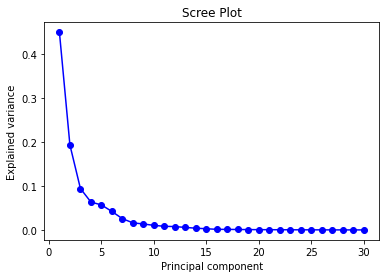

In [160]:
# Should I use the StandardScaler after using RobustScaler?

pca = PCA()
pca.fit(X_scaled)

scree_plot(pca)

In [163]:
pca.explained_variance_ratio_[:5].sum()

0.8577746768854834

In [201]:
pca = PCA(n_components=5)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

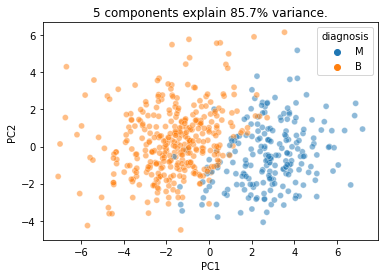

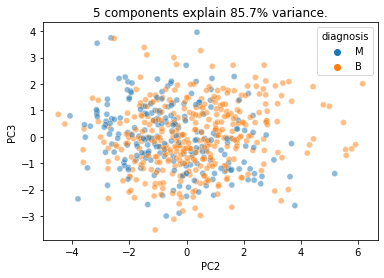

<AxesSubplot:title={'center':'5 components explain 85.7% variance.'}, xlabel='PC2', ylabel='PC3'>

In [202]:
title = '5 components explain 85.7% variance.'
component_plot((X_pca[:, 0], 'PC1'), (X_pca[:, 1], 'PC2'), y, title=title)

title = '5 components explain 85.7% variance.'
component_plot((X_pca[:, 1], 'PC2'), (X_pca[:, 2], 'PC3'), y, title=title)

Although you can see some cluster forming in PC1 and PC2, there are no proper clusters visible, especially not in PC2 and PC3. It is not good for visualization, although it is good for dimensionality reduction.

## tSNE

Next, we'll try tSNE on the dataset.
1. Run TSNE with default perplexity on the data set. Run tSNE several times. Does tSNE always give the same results when the parameters are held the same?
2. Vary the perplexity parameter and compare the results.
3. Color the plot by the diagnosis of each point. Pick a nice result to work with in the following exercises. 

 

In [168]:
from sklearn.manifold import TSNE

tnse = TSNE(method='barnes_hut', verbose=1, perplexity=40, n_iter=4000)
Y = tnse.fit_transform(X_scaled)

C:\Users\ddlat\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ddlat\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.107s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.339787
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.884308
[t-SNE] KL divergence after 1600 iterations: 0.926463


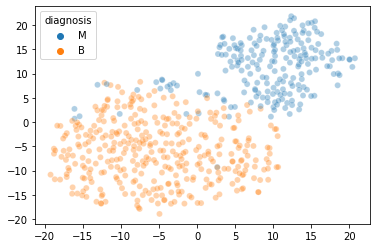

In [178]:
sns.scatterplot(x=Y[:, 0], y=Y[:, 1], hue=y, alpha=0.35)
plt.show()

## Next steps

We will do the following two things in the rest of this notebook:

1. Assuming that there are two clusters (a cluster for benign and a cluster for malignant samples), see which clustering algorithm performs best given the ground truth. 
2. It looks a bit like the malignant separate into two clusters, bringing the total number of clusters to 3. Can we find evidence that this is the right cluster, or maybe even find significant differences between the two malignant clusters?

We start with 1. Note that, while tSNE is itself quite good in separating clusters, the clustering is usually done in high-dimensional space (so, on the original data set X, rather than on the dimensionally reduced data set Y), and tSNE is only used as a visualization method.


## K-means clustering
Perform the following steps using KMeans and n_clusters = 2. 
1. Perform K-means clustering on X, that is, the original (scaled) dataset.
2. Perform K-means on the result of tSNE.
3. Perform K-means on the dataset consisting of PC1 and PC2.
4. Perform K-means on the dataset consisting of PC2 and PC3.
5. Compare the results of step 1-4 to the ground truth. What do you see? Is the dataset of PC1 and PC2 a good representative of the whole dataset (in terms of clustering)? What about the tSNE dataset? Or the dataset consisting of PC2 and PC3? How do you explain your observations?


In [ ]:
#your solution here

# Evaluate the clustering

Next we compute the adjusted rand index (ARI) for the clustering on X. Basically we compare the cluster outcome with the real outcome

In [152]:
# ARI
from sklearn import metrics
from sklearn import cluster


kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
kY = kmns.fit_predict(X)

metrics.adjusted_rand_score(kY, datas['diagnosis'])


0.67072064768808082

## Other clustering techniques

Use other clustering techniques and see if you can improve on the ARI.

1. Perform **spectral clustering** on X and visualize the clustering results on the tSNE-result. Try different parameter settings untill a proper clustering is found, and compute the ARI. 
2. Perform **hierarchical** on X and visualize the clustering results on the tSNE-result. Try different parameter settings untill a proper clustering is found, and compute the ARI. 
3. Perform **DBSCAN** on X and visualize the clustering results on the tSNE-result. Try different parameter settings untill a proper clustering is found, and compute the ARI. 


## Evaluation
Based on the results, which algorithm performs the best?

In [ ]:
#your solution here

## Two or three clusters?

Suppose we had no knowledge about the diagnosis and we didn't know that there are only two options (B and M). How many clusters would we choose?

1. Use the elbow method to see if this shows wheter we should use two or three clusters. 
2. Try the clustering methods as used before, but now try to create three clusters. Does this looks plausible?
3. If you were convinced that there are three clusters instead of two, what could be done to support this hypothesis?



### Solution

Some examples/literature

http://www.sthda.com/english/articles/29-cluster-validation-essentials/96-determining-the-optimal-number-of-clusters-3-must-know-methods/
Elbow method, silhouette method, gap statistic

Gap statistic in python: https://anaconda.org/milesgranger/gap-statistic/notebook
Interpret gap statistic: https://stats.stackexchange.com/questions/95290/how-should-i-interpret-gap-statistic

For n_clusters = 2 The average silhouette_score is : 0.344974005103


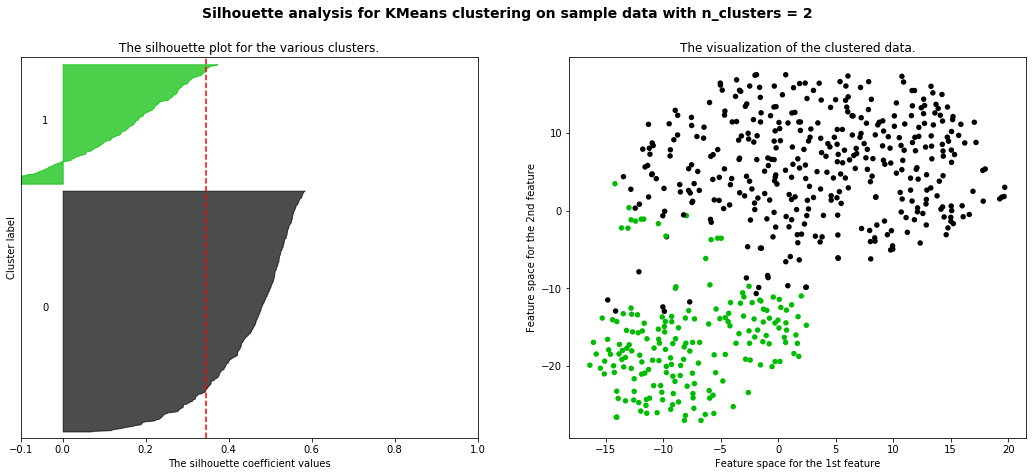

For n_clusters = 3 The average silhouette_score is : 0.314384009861


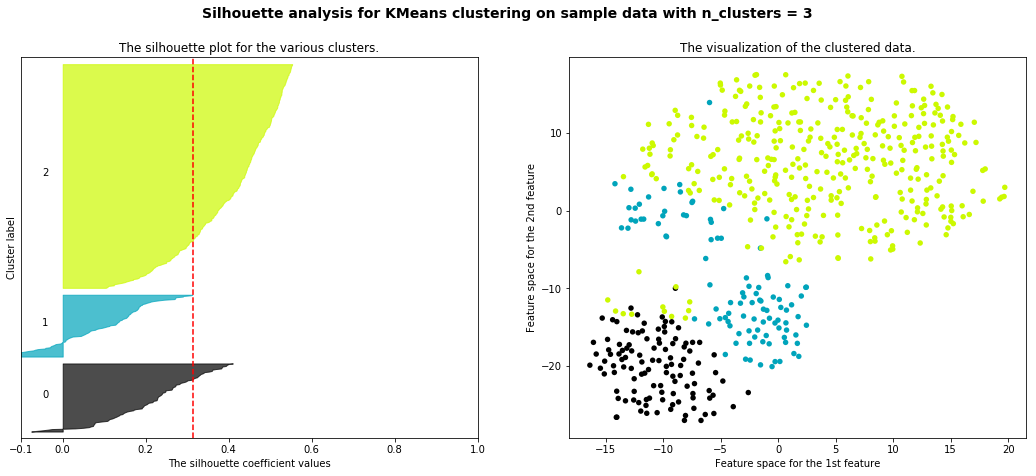

For n_clusters = 4 The average silhouette_score is : 0.279989637034


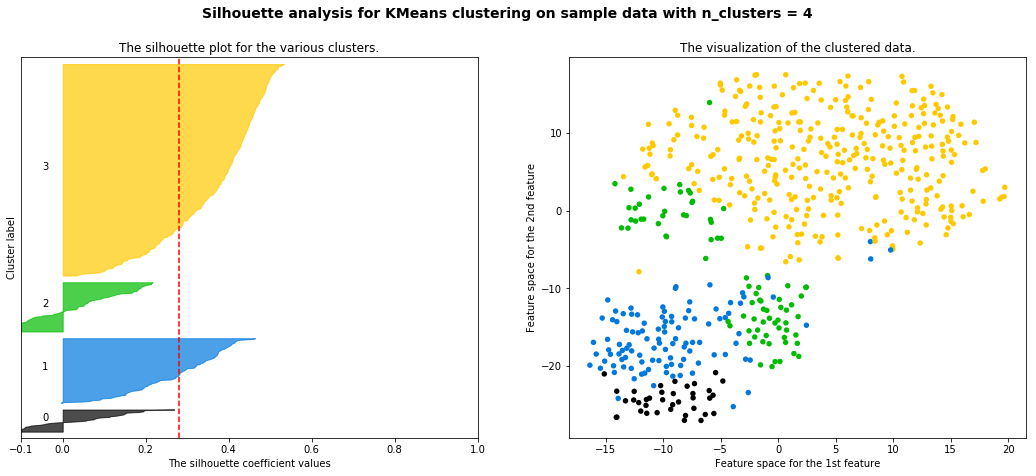

In [206]:
# The silhouette method suggests k=2

from sklearn.metrics import silhouette_samples, silhouette_score

y = datas['diagnosis']
X = X

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Y[:, 0], Y[:, 1], s=30, lw=0,
                c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("tSNE1")
    ax2.set_ylabel("tSNE2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show() 

In [224]:
# Gap statistic does not yield clear answer, also suggests 2 or 3

def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal
    